In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d

from scipy.integrate import quad 

from scipy.stats import lognorm

In [2]:

def f_moments(x, k):
    return np.array([x**i for i in range(1, k+1)])

def mean_lognorm(mu, s2):
    return np.exp(mu + s2/2)

def var_lognorm(mu, s2):
    return (np.exp(s2) - 1)*np.exp(2*mu + s2)

def nth_moment_lognormal(n,mu,s2):
    return np.exp(n*mu + n**2 * s2/2)


def b_moment_lognormal(mu, s2, k):
    return np.array([nth_moment_lognormal(n,mu,s2) for n in range(1, k+1)])

def pdf_lognorm(x,mu,s2):
    return  lognorm.pdf(x,
                        s=s2,
                        loc=0,
                        scale=np.exp(mu)) 



In [3]:
def KL_divergence(p, q, support, message=True):
    """Calculate KL divergence D_KL(P||Q) for continuous densities

    support has shape [l,u]
    """
    c, s = quad(lambda x: p(x)*np.log(p(x)/q(x)), *support)
    if(message):
        print(f"Error on divergence: {s}")
    return c

181.15220369401933


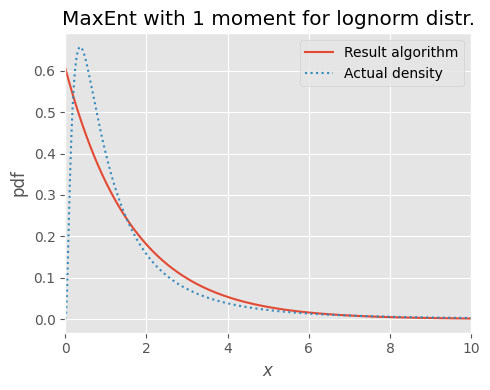

Lagrange parameters: [-0.60653066]
Error on divergence: 1.3936776569049528e-09
KL divergence: 0.08100191819299238


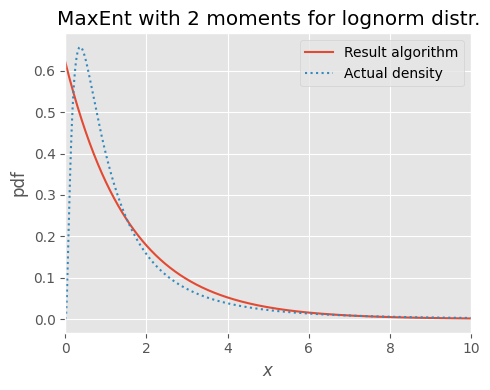

Lagrange parameters: [-0.63172735  0.00318493]
Error on divergence: 1.3937894071142841e-09
KL divergence: 0.07508132244409504


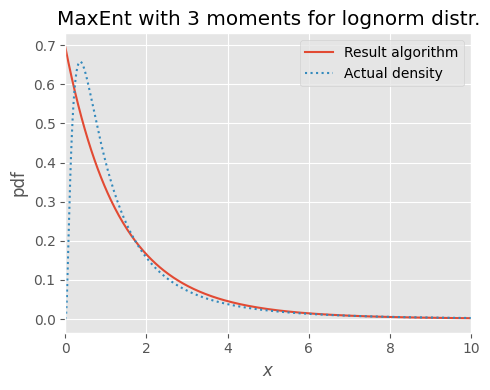

Lagrange parameters: [-7.58766805e-01  2.05888316e-02 -1.97255391e-04]
Error on divergence: 1.3954075991726981e-09
KL divergence: 0.060837605001077745


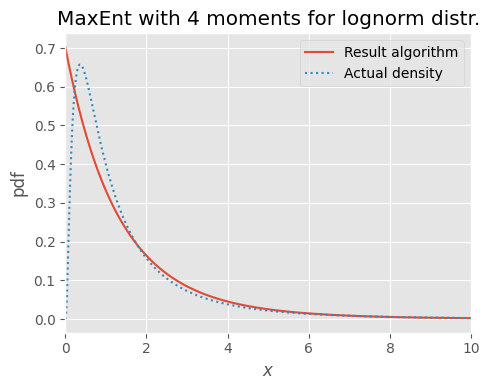

Lagrange parameters: [-7.73411493e-01  2.33306870e-02 -3.03730301e-04  1.08433686e-06]
Error on divergence: 1.3956837430468511e-09
KL divergence: 0.060629095125840346


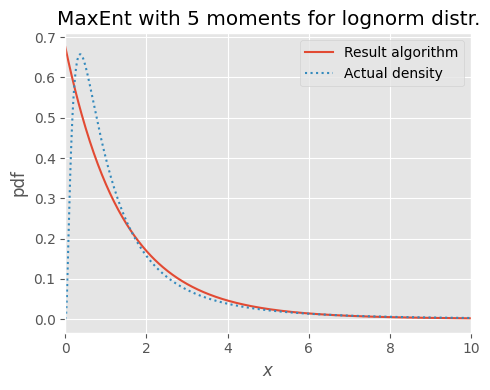

Lagrange parameters: [-7.08126737e-01  6.23868915e-03  8.14376033e-04 -2.12556909e-05
  9.20815858e-08]
Error on divergence: 1.3945030521038725e-09
KL divergence: 0.06312710630342584
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = 216.079
  Lambda_2 = -82.267
  Lambda_3 = 4.738
  Lambda_4 = -0.108
  Lambda_5 = 0.001
  Lambda_6 = -0.000
  Lambda_7 = 0.000


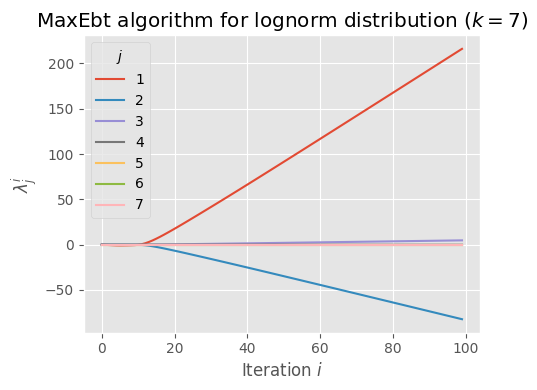

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -23.702
  Lambda_2 = 3.328
  Lambda_3 = -0.174
  Lambda_4 = 0.004
  Lambda_5 = -0.000
  Lambda_6 = 0.000
  Lambda_7 = -0.000
  Lambda_8 = 0.000


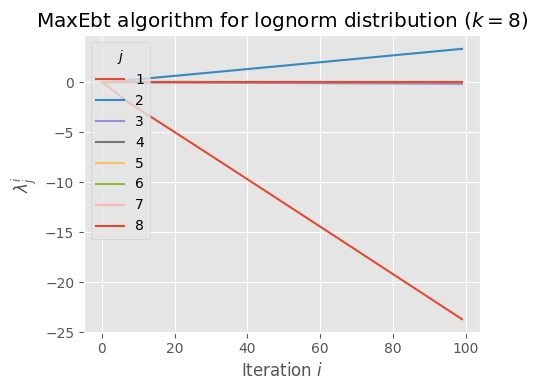

In [5]:
#Using all moments
mu = 0
s2 = 1

l = 0
n = 350

u = lognorm.ppf(1 - 10**(-7), s=s2, loc=mu, scale=1)
print(u)

def pdf_lognormal(x):
    return d.pdf_lognorm(x, mu, s2)

for k in [1,2,3,4,5,7,8]:
    ob_skewkurt = MaxEnt(support=[l,u],
                        n_quadrature=n,
                        b_constraints=b_moment_lognormal(mu,s2,k),
                        f_vector=f_moments,
                        f_param=[k])
    if ob_skewkurt.get_converges():
        if(k==1):
            title = f"MaxEnt with {k} moment for lognorm distr."
        else:
            title = f"MaxEnt with {k} moments for lognorm distr."
        ob_skewkurt.visualize_solution(xlim=[l,l+10],
                                    actual_density=pdf_lognorm,
                                    actual_param=[mu,s2], 
                                    title=title,
                                    title_save=f"figs/lognorm_moments_{k}.pdf")
        print(f"Lagrange parameters: {ob_skewkurt.get_la()}")
        KL_div  = KL_divergence(pdf_lognormal, ob_skewkurt.pdf, [l,u-u/3])
        print(f"KL divergence: {KL_div}")
    else:
        ob_skewkurt.visualize_algorithm(title=f"MaxEbt algorithm for lognorm distribution ($k={k}$)")

181.15220369401933
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = nan
  Lambda_2 = nan
  Lambda_3 = nan
  Lambda_4 = nan
  Lambda_5 = nan
  Lambda_6 = nan


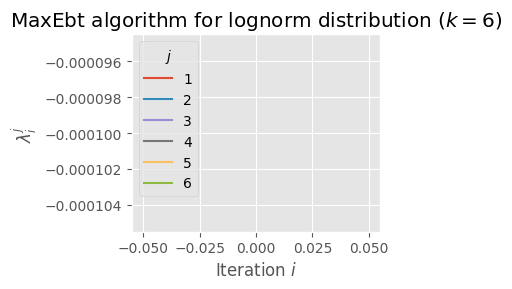

In [10]:
#WEIRD CASE where algorithm doesn't work || k=6
#because system can't be solved -> nan's
mu = 0
s2 = 1

l = 0
n = 350

u = lognorm.ppf(1 - 10**(-7), s=s2, loc=mu, scale=1)
print(u)

for k in [6]:
    if(k==6):
        start=np.full(6,-0.0001)
    else:
        start = None
    ob_skewkurt = MaxEnt(support=[l,u],
                        n_quadrature=n,
                        b_constraints=b_moment_lognormal(mu,s2,k),
                        f_vector=f_moments,
                        f_param=[k],
                        start=start)
    if ob_skewkurt._converges:
        ob_skewkurt.visualize_solution(xlim=[l,l+10],
                                    actual_density=pdf_lognorm,
                                    actual_param=[mu,s2], 
                                    title=f"MaxEnt density for lognorm distribution ($k={k}$)")
        print(f"Lagrange parameters: {ob_skewkurt.get_la()}")
    else:
        ob_skewkurt.visualize_algorithm(title=f"MaxEbt algorithm for lognorm distribution ($k={k}$)")